<a href="https://colab.research.google.com/github/subham27-07/Vision_Transformer/blob/main/Vision_Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.4 MB/s 
     |████████████████████████████████| 101 kB 10.5 MB/s 
     |████████████████████████████████| 596 kB 46.3 MB/s 
     |████████████████████████████████| 6.6 MB 28.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

%matplotlib inline

import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

In [ ]:
pshp = gpd.read_file('/content/drive/MyDrive/data/parcels/parcel_geometry_kane_20200319.shp')

In [ ]:
from osgeo import gdal


In [ ]:
!pip3 install osmium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 8.7 MB/s 


In [ ]:
!pip install -U googlemaps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for googlemaps: filename=googlemaps-4.6.0-py3-none-any.whl size=38554 sha256=2fb8062f13b2d9ef26234e51c44a75b2cece5187c8c35ca6cf88946695750c19
  Stored in directory: /root/.cache/pip/wheels/80/db/c0/6d958585fa97b20e250bf437acf7e6e715b4809c2dd4e55367
Successfully built googlemaps


In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
!pip3 install geopandas
!pip install descartes
%matplotlib inline


import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon

!pip3 install urbansim
from urbansim.utils import misc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
b = pd.read_csv('/content/drive/MyDrive/data/bldgs/buildings_kane_20200324.csv')
p = pd.read_csv('/content/drive/MyDrive/data/parcels/parcels_kane_20200319.csv').set_index('primary_id')
bshp = gpd.read_file('/content/drive/MyDrive/data/bldgs/building_footprints_kane_20200324.shp')
pshp = gpd.read_file('/content/drive/MyDrive/data/parcels/parcel_geometry_kane_20200319.shp')

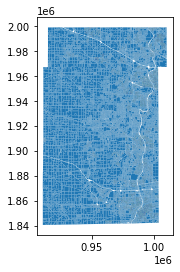

In [ ]:
pshp.head()
pshp.plot()

In [ ]:
pshp['Center_point'] = pshp['geometry'].centroid
#Extract lat and lon from the centerpoint
pshp["long"] = pshp.Center_point.map(lambda p: p.x)
pshp["lat"] = pshp.Center_point.map(lambda p: p.y)

In [ ]:
pshp.crs

<Projected CRS: EPSG:3435>
Name: NAD83 / Illinois East (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Illinois - counties of Boone; Champaign; Clark; Clay; Coles; Cook; Crawford; Cumberland; De Kalb; De Witt; Douglas; Du Page; Edgar; Edwards; Effingham; Fayette; Ford; Franklin; Gallatin; Grundy; Hamilton; Hardin; Iroquois; Jasper; Jefferson; Johnson; Kane; Kankakee; Kendall; La Salle; Lake; Lawrence; Livingston; Macon; Marion; Massac; McHenry; McLean; Moultrie; Piatt; Pope; Richland; Saline; Shelby; Vermilion; Wabash; Wayne; White; Will; Williamson.
- bounds: (-89.28, 37.06, -87.02, 42.5)
Coordinate Operation:
- name: SPCS83 Illinois East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
pshp.head()

primary_id             apn  \
0     5000000  089-0101100001   
1     5000001  089-0101100002   
2     5000002  089-0101200003   
3     5000003  089-0101200006   
4     5000004  089-0101200009   

                                            geometry  \
0  POLYGON ((943960.473 1998640.796, 943962.274 1...   
1  POLYGON ((942680.543 1997311.858, 942680.557 1...   
2  POLYGON ((945323.562 1996000.932, 945309.464 1...   
3  POLYGON ((946635.505 1997128.852, 946635.557 1...   
4  POLYGON ((945500.504 1996858.302, 945442.207 1...   

                     Center_point           long           lat  
0  POINT (942787.412 1997783.895)  942787.412163  1.997784e+06  
1  POINT (942443.772 1996560.255)  942443.771936  1.996560e+06  
2  POINT (944679.519 1996211.706)  944679.518863  1.996212e+06  
3  POINT (946345.583 1996670.685)  946345.582697  1.996671e+06  
4  POINT (945404.057 1997046.041)  945404.056991  1.997046e+06

In [ ]:
import geopandas as gpd
from geopandas import GeoDataFrame
mtc_crs = 'WGS84'
parcel_proj = pshp.to_crs(mtc_crs)

In [ ]:
parcel_proj.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
parcel_proj.head()

primary_id             apn  \
0     5000000  089-0101100001   
1     5000001  089-0101100002   
2     5000002  089-0101200003   
3     5000003  089-0101200006   
4     5000004  089-0101200009   

                                            geometry  
0  POLYGON ((-88.48192 42.15372, -88.48191 42.152...  
1  POLYGON ((-88.48663 42.15006, -88.48662 42.148...  
2  POLYGON ((-88.47687 42.14648, -88.47693 42.146...  
3  POLYGON ((-88.47204 42.14958, -88.47204 42.149...  
4  POLYGON ((-88.47623 42.14883, -88.47644 42.148...

In [ ]:
parcel_proj['Center_point']=parcel_proj['geometry'].centroid

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [ ]:
parcel_proj

primary_id               apn  \
0          5000000    089-0101100001   
1          5000001    089-0101100002   
2          5000002    089-0101200003   
3          5000003    089-0101200006   
4          5000004    089-0101200009   
...            ...               ...   
156848     5007188  089-0209353001-G   
156849     5080634  089-0926128013-G   
156850     5050784  089-0618464001-G   
156851     5050028  089-0617354010-G   
156852     5107169  089-1222182009-G   

                                                 geometry  \
0       POLYGON ((-88.48192 42.15372, -88.48191 42.152...   
1       POLYGON ((-88.48663 42.15006, -88.48662 42.148...   
2       POLYGON ((-88.47687 42.14648, -88.47693 42.146...   
3       POLYGON ((-88.47204 42.14958, -88.47204 42.149...   
4       POLYGON ((-88.47623 42.14883, -88.47644 42.148...   
...                                                   ...   
156848  POLYGON ((-88.42787 42.12490, -88.42856 42.124...   
156849  POLYGON ((-88.29151 41.92705, -88.29153 41.926...   
156850  POLYGON ((-88.36397 42.02976, -88.36401 42.029...   
156851  POLYGON ((-88.35920 42.03235, -88.35918 42.032...   
156852  POLYGON ((-88.31256 41.84780, -88.31307 41.847...   

                      Center_point  
0       POINT (-88.48624 42.15136)  
1       POINT (-88.48750 42.14800)  
2       POINT (-88.47925 42.14705)  
3       POINT (-88.47311 42.14832)  
4       POINT (-88.47658 42.14935)  
...                            ...  
156848  POINT (-88.42847 42.12579)  
156849  POINT (-88.29195 41.92714)  
156850  POINT (-88.36526 42.03126)  
156851  POINT (-88.35961 42.03186)  
156852  POINT (-88.31270 41.84800)  

[156853 rows x 4 columns]

In [ ]:
parcel_proj["long"] = parcel_proj.Center_point.map(lambda p: p.x)
parcel_proj["lat"] = parcel_proj.Center_point.map(lambda p: p.y)

In [ ]:

parcel_proj.to_csv('parcel1.csv',encoding='utf-8-sig')
from google.colab import files
files.download("parcel1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
mapbox://styles/subhamkr/cl5vbt7ua000a14nx95zmdxzv

In [ ]:
https://api.mapbox.com/styles/v1/mapbox/light-v10/static/-88.48624,42.15136,22/300x300?access_token=pk.eyJ1Ijoic3ViaGFta3IiLCJhIjoiY2t4OTVpNXV6MGNiNTJ1b2M4ajNydGo2NSJ9.HEBbZanUG-z3wa-H2IEpgw

In [ ]:
pk.eyJ1Ijoic3ViaGFta3IiLCJhIjoiY2t4OTVpNXV6MGNiNTJ1b2M4ajNydGo2NSJ9.HEBbZanUG-z3wa-H2IEpgw

In [ ]:
mapbox://styles/mapbox/streets-v11

In [ ]:
https://api.mapbox.com/styles/v1/mapbox/streets-v11/static/-88.48624,42.15136,22/300x300?access_token=pk.eyJ1Ijoic3ViaGFta3IiLCJhIjoiY2t4OTVpNXV6MGNiNTJ1b2M4ajNydGo2NSJ9.HEBbZanUG-z3wa-H2IEpgw

In [ ]:
pshp["long"] = pshp.Center_point.map(lambda p: p.x)
pshp["lat"] = pshp.Center_point.map(lambda p: p.y)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data/parcel1.csv')

In [ ]:
df

Unnamed: 0  primary_id               apn  \
0                0     5000000    089-0101100001   
1                1     5000001    089-0101100002   
2                2     5000002    089-0101200003   
3                3     5000003    089-0101200006   
4                4     5000004    089-0101200009   
...            ...         ...               ...   
156848      156848     5007188  089-0209353001-G   
156849      156849     5080634  089-0926128013-G   
156850      156850     5050784  089-0618464001-G   
156851      156851     5050028  089-0617354010-G   
156852      156852     5107169  089-1222182009-G   

                                                 geometry  \
0       POLYGON ((-88.481916753438 42.15371684760563, ...   
1       POLYGON ((-88.48662818171299 42.15006386323544...   
2       POLYGON ((-88.47687347729219 42.14647912230836...   
3       POLYGON ((-88.47204249429548 42.14958023161699...   
4       POLYGON ((-88.47622630194371 42.14883267053619...   
...                                                   ...   
156848  POLYGON ((-88.4278742639196 42.12489957048436,...   
156849  POLYGON ((-88.29151129477498 41.92704543884941...   
156850  POLYGON ((-88.36397243149193 42.02976280852384...   
156851  POLYGON ((-88.35919934754315 42.03234729235455...   
156852  POLYGON ((-88.31255868498585 41.84780321897986...   

                                         Center_point       long        lat  
0         POINT (-88.48623723013722 42.1513596756864) -88.486237  42.151360  
1        POINT (-88.48749632366086 42.14800013911751) -88.487496  42.148000  
2        POINT (-88.47924969245322 42.14705449965715) -88.479250  42.147054  
3        POINT (-88.47310886061491 42.14832166465172) -88.473109  42.148322  
4        POINT (-88.47658312144972 42.14934740954665) -88.476583  42.149347  
...                                               ...        ...        ...  
156848  POINT (-88.42847325460173 42.125785729497665) -88.428473  42.125786  
156849    POINT (-88.2919486307173 41.92714112207775) -88.291949  41.927141  
156850  POINT (-88.36525869209945 42.031260891905184) -88.365259  42.031261  
156851   POINT (-88.35961121383914 42.03185739805132) -88.359611  42.031857  
156852   POINT (-88.31269685072911 41.84800119321221) -88.312697  41.848001  

[156853 rows x 7 columns]

In [ ]:
images=[]
https://api.mapbox.com/styles/v1/mapbox/streets-v11/static/-88.48624,42.15136,22/300x300?access_token=pk.eyJ1Ijoic3ViaGFta3IiLCJhIjoiY2t4OTVpNXV6MGNiNTJ1b2M4ajNydGo2NSJ9.HEBbZanUG-z3wa-H2IEpgw


In [ ]:
df['location']= df['long'].astype(str) + ',' + df['lat'].astype(str)

In [ ]:
df

Unnamed: 0  primary_id               apn  \
0                0     5000000    089-0101100001   
1                1     5000001    089-0101100002   
2                2     5000002    089-0101200003   
3                3     5000003    089-0101200006   
4                4     5000004    089-0101200009   
...            ...         ...               ...   
156848      156848     5007188  089-0209353001-G   
156849      156849     5080634  089-0926128013-G   
156850      156850     5050784  089-0618464001-G   
156851      156851     5050028  089-0617354010-G   
156852      156852     5107169  089-1222182009-G   

                                                 geometry  \
0       POLYGON ((-88.481916753438 42.15371684760563, ...   
1       POLYGON ((-88.48662818171299 42.15006386323544...   
2       POLYGON ((-88.47687347729219 42.14647912230836...   
3       POLYGON ((-88.47204249429548 42.14958023161699...   
4       POLYGON ((-88.47622630194371 42.14883267053619...   
...                                                   ...   
156848  POLYGON ((-88.4278742639196 42.12489957048436,...   
156849  POLYGON ((-88.29151129477498 41.92704543884941...   
156850  POLYGON ((-88.36397243149193 42.02976280852384...   
156851  POLYGON ((-88.35919934754315 42.03234729235455...   
156852  POLYGON ((-88.31255868498585 41.84780321897986...   

                                         Center_point       long        lat  \
0         POINT (-88.48623723013722 42.1513596756864) -88.486237  42.151360   
1        POINT (-88.48749632366086 42.14800013911751) -88.487496  42.148000   
2        POINT (-88.47924969245322 42.14705449965715) -88.479250  42.147054   
3        POINT (-88.47310886061491 42.14832166465172) -88.473109  42.148322   
4        POINT (-88.47658312144972 42.14934740954665) -88.476583  42.149347   
...                                               ...        ...        ...   
156848  POINT (-88.42847325460173 42.125785729497665) -88.428473  42.125786   
156849    POINT (-88.2919486307173 41.92714112207775) -88.291949  41.927141   
156850  POINT (-88.36525869209945 42.031260891905184) -88.365259  42.031261   
156851   POINT (-88.35961121383914 42.03185739805132) -88.359611  42.031857   
156852   POINT (-88.31269685072911 41.84800119321221) -88.312697  41.848001   

                                     location  
0         -88.48623723013722,42.1513596756864  
1        -88.48749632366086,42.14800013911751  
2        -88.47924969245322,42.14705449965715  
3        -88.47310886061491,42.14832166465172  
4        -88.47658312144972,42.14934740954665  
...                                       ...  
156848   -88.42847325460173,42.12578572949767  
156849    -88.2919486307173,41.92714112207775  
156850  -88.36525869209945,42.031260891905184  
156851   -88.35961121383914,42.03185739805132  
156852   -88.31269685072911,41.84800119321221  

[156853 rows x 8 columns]

In [ ]:
df['url']='https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/'+df['location']+',20/400x400?access_token=pk.eyJ1Ijoic3ViaGFta3IiLCJhIjoiY2t4OTVpNXV6MGNiNTJ1b2M4ajNydGo2NSJ9.HEBbZanUG-z3wa-H2IEpgw'

In [ ]:
df

Unnamed: 0  primary_id               apn  \
0                0     5000000    089-0101100001   
1                1     5000001    089-0101100002   
2                2     5000002    089-0101200003   
3                3     5000003    089-0101200006   
4                4     5000004    089-0101200009   
...            ...         ...               ...   
156848      156848     5007188  089-0209353001-G   
156849      156849     5080634  089-0926128013-G   
156850      156850     5050784  089-0618464001-G   
156851      156851     5050028  089-0617354010-G   
156852      156852     5107169  089-1222182009-G   

                                                 geometry  \
0       POLYGON ((-88.481916753438 42.15371684760563, ...   
1       POLYGON ((-88.48662818171299 42.15006386323544...   
2       POLYGON ((-88.47687347729219 42.14647912230836...   
3       POLYGON ((-88.47204249429548 42.14958023161699...   
4       POLYGON ((-88.47622630194371 42.14883267053619...   
...                                                   ...   
156848  POLYGON ((-88.4278742639196 42.12489957048436,...   
156849  POLYGON ((-88.29151129477498 41.92704543884941...   
156850  POLYGON ((-88.36397243149193 42.02976280852384...   
156851  POLYGON ((-88.35919934754315 42.03234729235455...   
156852  POLYGON ((-88.31255868498585 41.84780321897986...   

                                         Center_point       long        lat  \
0         POINT (-88.48623723013722 42.1513596756864) -88.486237  42.151360   
1        POINT (-88.48749632366086 42.14800013911751) -88.487496  42.148000   
2        POINT (-88.47924969245322 42.14705449965715) -88.479250  42.147054   
3        POINT (-88.47310886061491 42.14832166465172) -88.473109  42.148322   
4        POINT (-88.47658312144972 42.14934740954665) -88.476583  42.149347   
...                                               ...        ...        ...   
156848  POINT (-88.42847325460173 42.125785729497665) -88.428473  42.125786   
156849    POINT (-88.2919486307173 41.92714112207775) -88.291949  41.927141   
156850  POINT (-88.36525869209945 42.031260891905184) -88.365259  42.031261   
156851   POINT (-88.35961121383914 42.03185739805132) -88.359611  42.031857   
156852   POINT (-88.31269685072911 41.84800119321221) -88.312697  41.848001   

                                     location  \
0         -88.48623723013722,42.1513596756864   
1        -88.48749632366086,42.14800013911751   
2        -88.47924969245322,42.14705449965715   
3        -88.47310886061491,42.14832166465172   
4        -88.47658312144972,42.14934740954665   
...                                       ...   
156848   -88.42847325460173,42.12578572949767   
156849    -88.2919486307173,41.92714112207775   
156850  -88.36525869209945,42.031260891905184   
156851   -88.35961121383914,42.03185739805132   
156852   -88.31269685072911,41.84800119321221   

                                                      url  
0       https://api.mapbox.com/styles/v1/mapbox/satell...  
1       https://api.mapbox.com/styles/v1/mapbox/satell...  
2       https://api.mapbox.com/styles/v1/mapbox/satell...  
3       https://api.mapbox.com/styles/v1/mapbox/satell...  
4       https://api.mapbox.com/styles/v1/mapbox/satell...  
...                                                   ...  
156848  https://api.mapbox.com/styles/v1/mapbox/satell...  
156849  https://api.mapbox.com/styles/v1/mapbox/satell...  
156850  https://api.mapbox.com/styles/v1/mapbox/satell...  
156851  https://api.mapbox.com/styles/v1/mapbox/satell...  
156852  https://api.mapbox.com/styles/v1/mapbox/satell...  

[156853 rows x 9 columns]

In [ ]:
from google.colab import files as FILE
import os



In [ ]:
from google.colab import files
files.download("https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/-88.48624,42.15136,18/400x400?access_token=pk.eyJ1Ijoic3ViaGFta3IiLCJhIjoiY2t4OTVpNXV6MGNiNTJ1b2M4ajNydGo2NSJ9.HEBbZanUG-z3wa-H2IEpgw")

FileNotFoundError: ignored

In [ ]:
import requests 


In [ ]:
image1=[]

file_url = "https://api.mapbox.com/styles/v1/mapbox/satellite-v9/static/-88.48624,42.15136,18/400x400?access_token=pk.eyJ1Ijoic3ViaGFta3IiLCJhIjoiY2t4OTVpNXV6MGNiNTJ1b2M4ajNydGo2NSJ9.HEBbZanUG-z3wa-H2IEpgw"
    
r = requests.get(file_url, stream = True) 


image1.append(r)

  


In [ ]:
from IPython.display import Image
Image(image)

/usr/local/lib/python3.7/dist-packages/IPython/core/formatters.py:364: FormatterWarning: image/png formatter returned invalid type <class 'list'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [ ]:
df

Unnamed: 0  primary_id               apn  \
0                0     5000000    089-0101100001   
1                1     5000001    089-0101100002   
2                2     5000002    089-0101200003   
3                3     5000003    089-0101200006   
4                4     5000004    089-0101200009   
...            ...         ...               ...   
156848      156848     5007188  089-0209353001-G   
156849      156849     5080634  089-0926128013-G   
156850      156850     5050784  089-0618464001-G   
156851      156851     5050028  089-0617354010-G   
156852      156852     5107169  089-1222182009-G   

                                                 geometry  \
0       POLYGON ((-88.481916753438 42.15371684760563, ...   
1       POLYGON ((-88.48662818171299 42.15006386323544...   
2       POLYGON ((-88.47687347729219 42.14647912230836...   
3       POLYGON ((-88.47204249429548 42.14958023161699...   
4       POLYGON ((-88.47622630194371 42.14883267053619...   
...                                                   ...   
156848  POLYGON ((-88.4278742639196 42.12489957048436,...   
156849  POLYGON ((-88.29151129477498 41.92704543884941...   
156850  POLYGON ((-88.36397243149193 42.02976280852384...   
156851  POLYGON ((-88.35919934754315 42.03234729235455...   
156852  POLYGON ((-88.31255868498585 41.84780321897986...   

                                         Center_point       long        lat  \
0         POINT (-88.48623723013722 42.1513596756864) -88.486237  42.151360   
1        POINT (-88.48749632366086 42.14800013911751) -88.487496  42.148000   
2        POINT (-88.47924969245322 42.14705449965715) -88.479250  42.147054   
3        POINT (-88.47310886061491 42.14832166465172) -88.473109  42.148322   
4        POINT (-88.47658312144972 42.14934740954665) -88.476583  42.149347   
...                                               ...        ...        ...   
156848  POINT (-88.42847325460173 42.125785729497665) -88.428473  42.125786   
156849    POINT (-88.2919486307173 41.92714112207775) -88.291949  41.927141   
156850  POINT (-88.36525869209945 42.031260891905184) -88.365259  42.031261   
156851   POINT (-88.35961121383914 42.03185739805132) -88.359611  42.031857   
156852   POINT (-88.31269685072911 41.84800119321221) -88.312697  41.848001   

                                     location  \
0         -88.48623723013722,42.1513596756864   
1        -88.48749632366086,42.14800013911751   
2        -88.47924969245322,42.14705449965715   
3        -88.47310886061491,42.14832166465172   
4        -88.47658312144972,42.14934740954665   
...                                       ...   
156848   -88.42847325460173,42.12578572949767   
156849    -88.2919486307173,41.92714112207775   
156850  -88.36525869209945,42.031260891905184   
156851   -88.35961121383914,42.03185739805132   
156852   -88.31269685072911,41.84800119321221   

                                                      url  
0       https://api.mapbox.com/styles/v1/mapbox/satell...  
1       https://api.mapbox.com/styles/v1/mapbox/satell...  
2       https://api.mapbox.com/styles/v1/mapbox/satell...  
3       https://api.mapbox.com/styles/v1/mapbox/satell...  
4       https://api.mapbox.com/styles/v1/mapbox/satell...  
...                                                   ...  
156848  https://api.mapbox.com/styles/v1/mapbox/satell...  
156849  https://api.mapbox.com/styles/v1/mapbox/satell...  
156850  https://api.mapbox.com/styles/v1/mapbox/satell...  
156851  https://api.mapbox.com/styles/v1/mapbox/satell...  
156852  https://api.mapbox.com/styles/v1/mapbox/satell...  

[156853 rows x 9 columns]

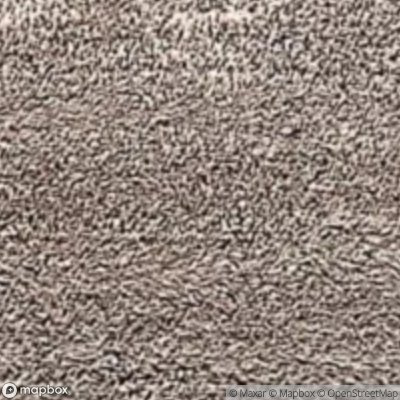

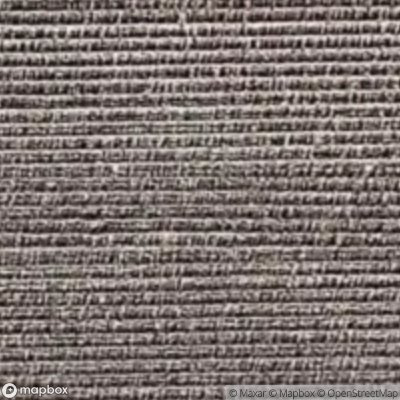

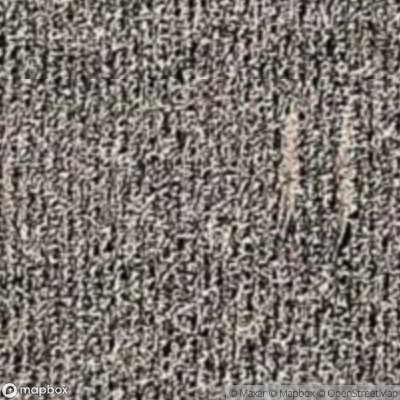

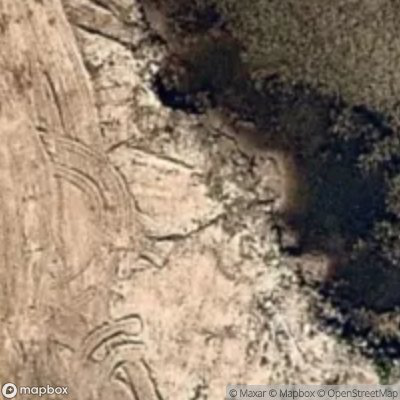

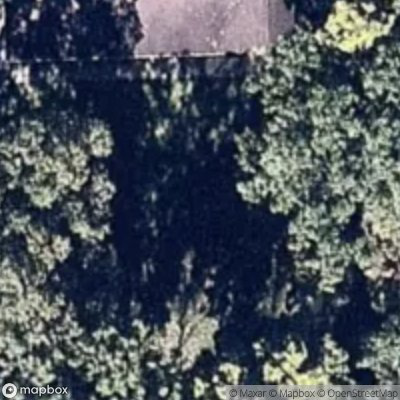

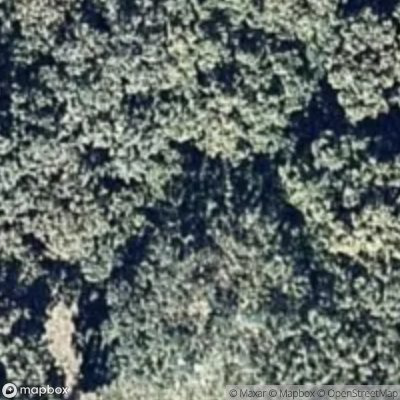

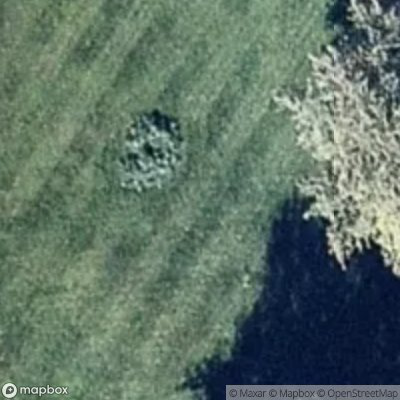

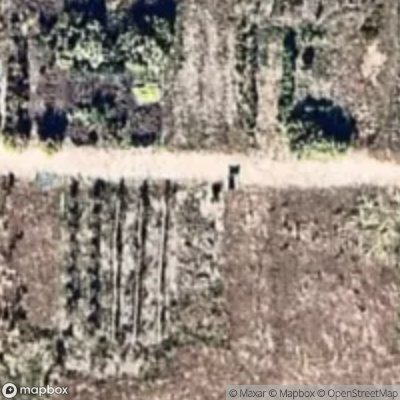

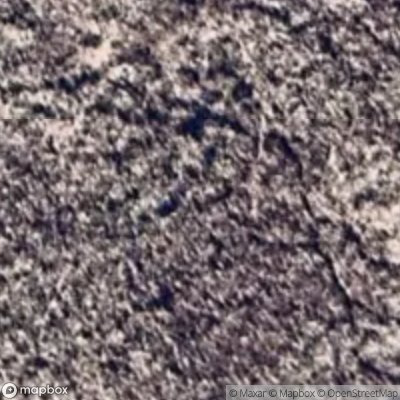

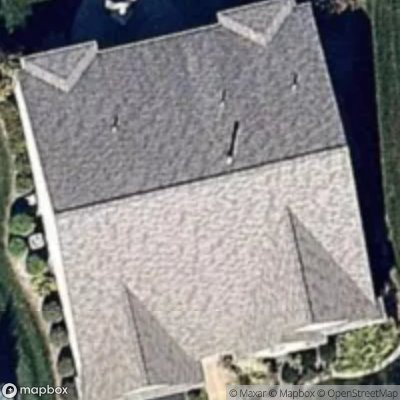

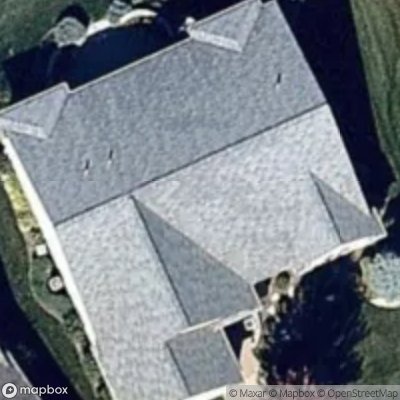

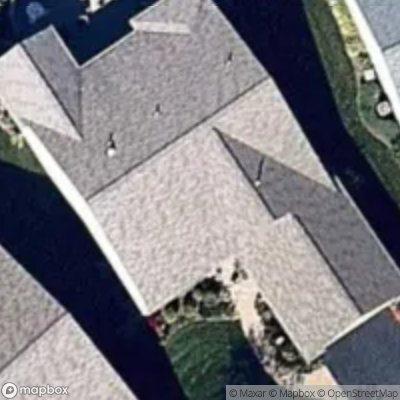

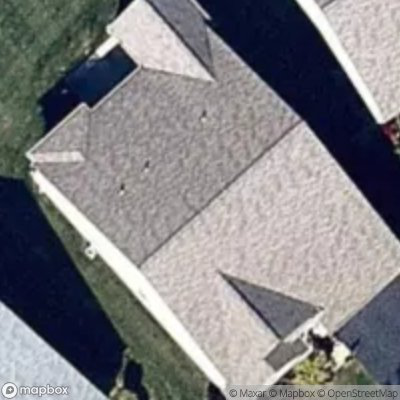

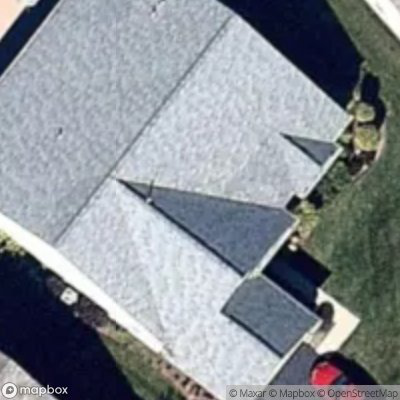

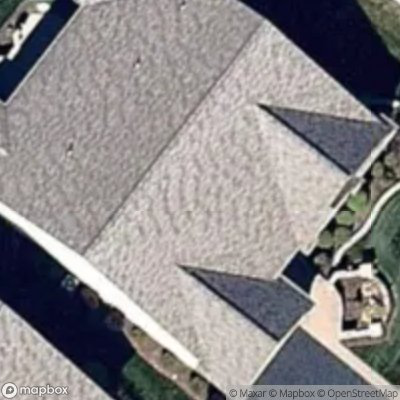

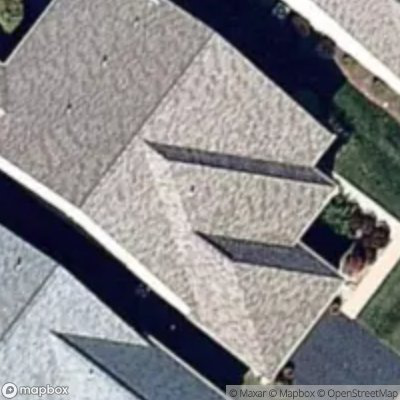

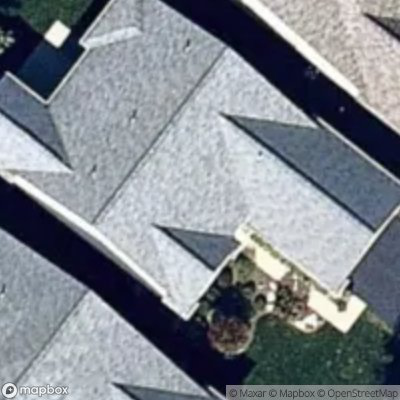

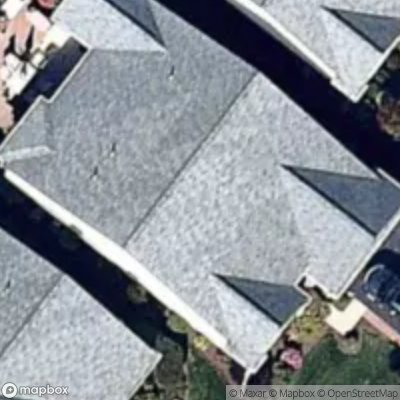

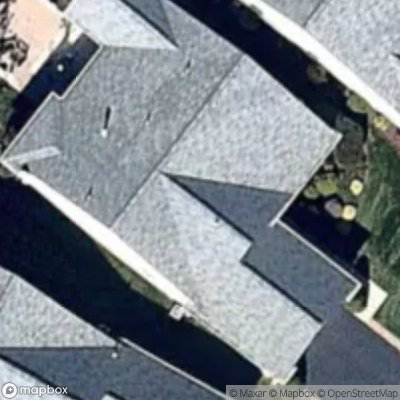

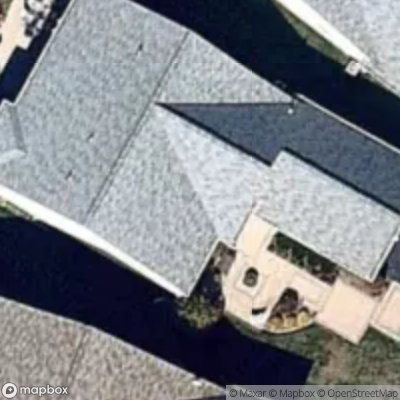

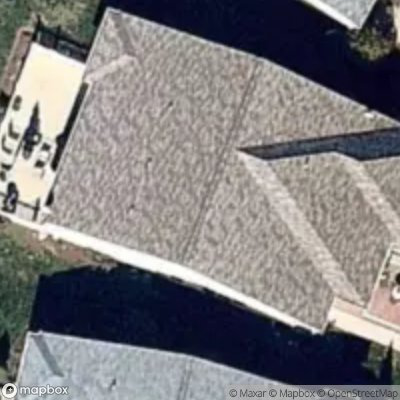

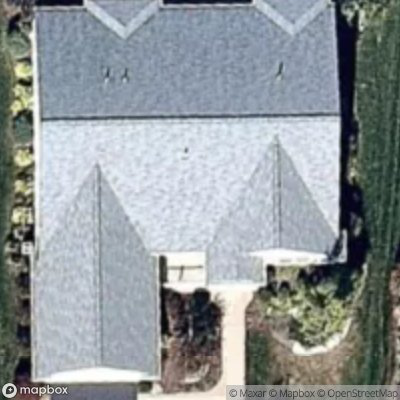

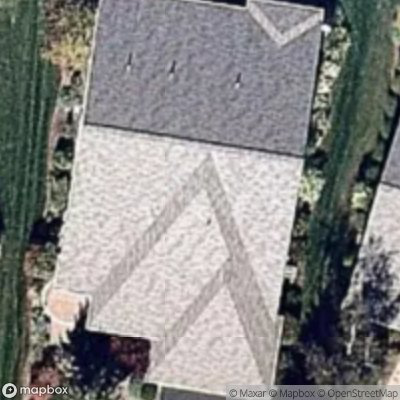

KeyboardInterrupt: ignored

In [ ]:
image2=[]
y=df['url']

for idx, url in enumerate(y):
  image = io.imread(url) 
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  cv2.imwrite(f'/content/drive/MyDrive/data/image/{df.primary_id.loc[idx]}.png',image_2)
  # image2.append(image_2)
  cv2_imshow(image_2)
  print('\n')